In [1]:
import pandas as pd
concrete = pd.read_csv('../Cases/Concrete Strength/Concrete_Data.csv')
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
concrete.isna().sum().sum()

0

In [3]:
X, y = concrete.drop('Strength', axis=1), concrete['Strength']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score

In [8]:
max_depths = np.arange(2, 20)
min_samples_splits = np.arange(2,100,4)
min_samples_leafs = np.arange(1,100,5)
scores = []

for i in max_depths:
    for j in min_samples_splits:
        for k in min_samples_leafs:
            dct = DecisionTreeRegressor(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_test)
            scores.append([i, j, k, r2_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns=['Max_Depth', 'Min_Samples_Split', 'Min_Samples_leaf', 'R2_score'])
df_scores.sort_values('R2_score', ascending=False).iloc[0]

Max_Depth            15.000000
Min_Samples_Split     2.000000
Min_Samples_leaf      1.000000
R2_score              0.851131
Name: 6500, dtype: float64

In [11]:
# import matplotlib.pyplot as plt
# dtr = DecisionTreeRegressor(random_state=24, max_depth=15, min_samples_split=2, min_samples_leaf=1)
# dtr.fit(X_train, y_train)
# plt.figure(figsize=(12, 8))
# tree.plot_tree(dtr, feature_names=list(X_train.columns), filled=True)

In [12]:
df_imp = pd.DataFrame({'Importance': dtr.feature_importances_, 'Column': dtr.feature_names_in_})
df_imp.sort_values('Importance', ascending=False, inplace=True)

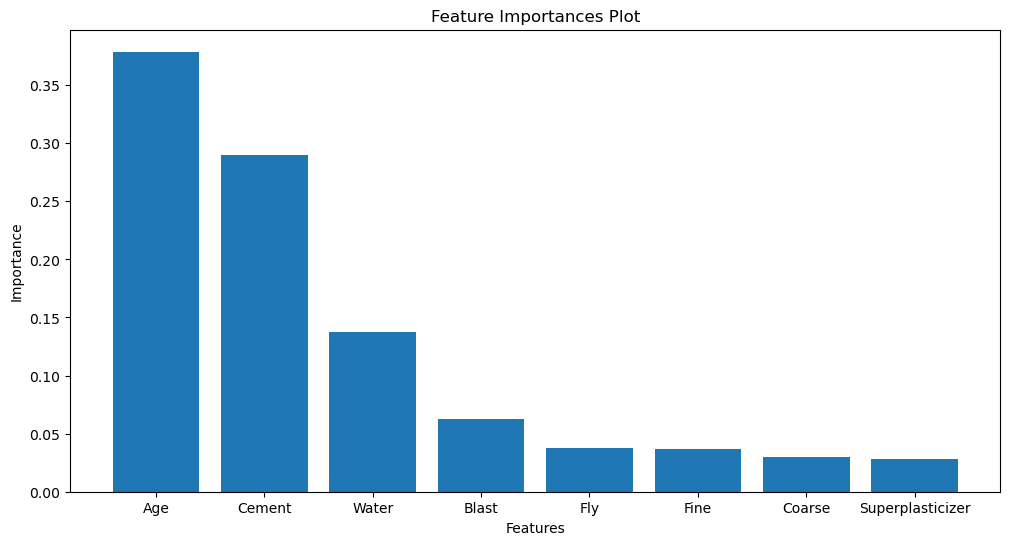

In [16]:
plt.figure(figsize=(12,6))
plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title('Feature Importances Plot')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

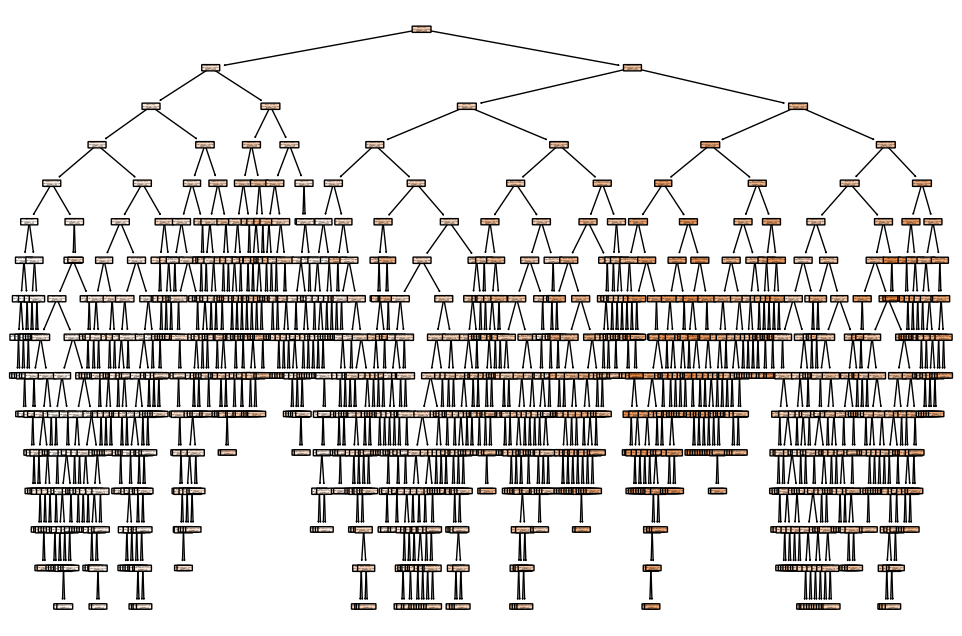

In [18]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dtr, feature_names=list(X_train.columns), filled=True, rounded=True)
plt.show()

In [20]:
plt.savefig('decision_tree.png', dpi=300)


<Figure size 640x480 with 0 Axes>